# Лабораторная работа № 1
## Вариант 1
### Выполнила: Корнилова Ксения, группа 17 АСВ

In [246]:
import numpy as np
import pandas as pd
titanic_df = pd.read_csv('titanic3.csv')
titanic_df.tail() #посмотримм для примера 5 нижних строк

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


1. Определите количество мужчин и женщин, которые ехали на корабле.

In [160]:
titanic_df.groupby('Sex')['PassengerId'].count()

Sex
female    314
male      577
Name: PassengerId, dtype: int64

2. Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров. 

In [161]:
pass_data = pd.read_csv('titanic3.csv')
a = len(pass_data)
b = len(pass_data[(pass_data.Survived == 1)])
c = (b/a)*100
print('Выжило пассажиров: ', b, ' Всего пассажиров: ', a, ' Процент выживших: ', c)

Выжило пассажиров:  342  Всего пассажиров:  891  Процент выживших:  38.38383838383838


3. Какую долю пассажиры первого класса составляли среди всех пассажиров?

In [162]:
e = len(pass_data[(pass_data.Pclass == 1)])
f = (e/a)*100
print('Пассажиров в первом классе: ', e, ' Всего пассажиров: ', a, ' Процент пассажиров в первом классе: ', f)

Пассажиров в первом классе:  216  Всего пассажиров:  891  Процент пассажиров в первом классе:  24.242424242424242


4. Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров. 

In [163]:
g = pass_data['Age'].median()
h = pass_data['Age'].mean()
print('Средний возраст пассажиров: ', h, 'Медиана возраста: ', g)

Средний возраст пассажиров:  29.69911764705882 Медиана возраста:  28.0


5. Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Оцените значение p-value. Постройте плотность распределения признаков SibSp и Parch.

In [164]:
pass_data['Parch'].corr(pass_data['SibSp'])

0.4148376986201515

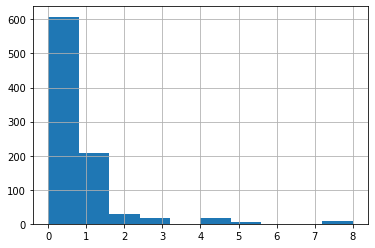

In [165]:
pass_data.SibSp.hist(bins = 10)

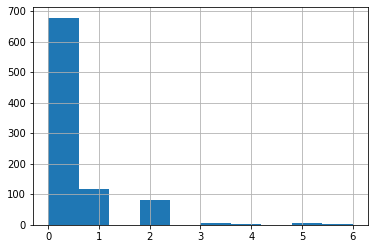

In [166]:
pass_data.Parch.hist(bins = 10)

6. Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские.

In [218]:
pass_female = pass_data[pass_data['Name'].str.contains('Mrs') | pass_data['Name'].str.contains('Miss') | pass_data['Name'].str.contains('Ms') == True] #выбираем "женские"

def get_first_name(Name):
        return (Name.split('.')[1].strip()).split(' ')[0].strip() #получаем список всех имен
    
first_name = pass_female['Name'].apply(get_first_name) #выбираем список имен из женских имен
df = pd.DataFrame(first_name)
print ('Имя',(df.groupby('Name')['Name'].count()).idxmax(), 'встречается', (df.groupby('Name')['Name'].count()).max(), 'раз')



Имя William встречается 13 раз


7. Коррелирует ли класс, которым ехал пассажир, с выживаемостью?

In [219]:
pass_data['Pclass'].corr(pass_data['Survived'])

-0.33848103596101575

8. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких графиках

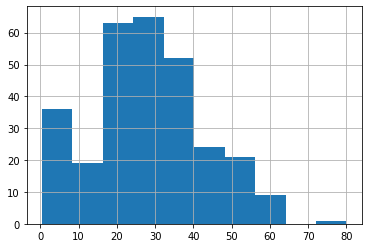

In [226]:
surv_pass = pass_data[(pass_data.Survived == 1)] #можно было pass_data.Age.hist(pass_data['Survived']), поздно поняла это
surv_pass.Age.hist(bins = 10)

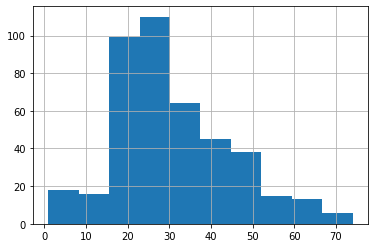

In [228]:
nosurv_pass = pass_data[(pass_data.Survived == 0)] #можно было pass_data.Age.hist(pass_data['Survived']), поздно поняла это
nosurv_pass.Age.hist(bins = 10)

9. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015B7F70DBC8>,
      dtype=object)

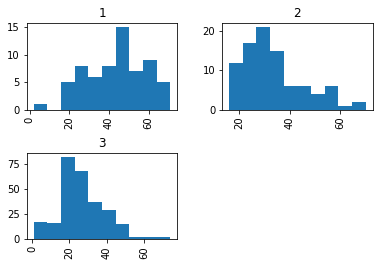

In [255]:
surv_pass.Age.hist(pass_data['Pclass'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015B7F70D5C8>,
      dtype=object)

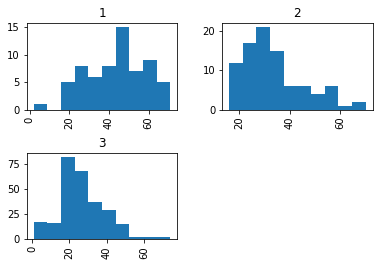

In [256]:
nosurv_pass.Age.hist(pass_data['Pclass'])

10. Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.

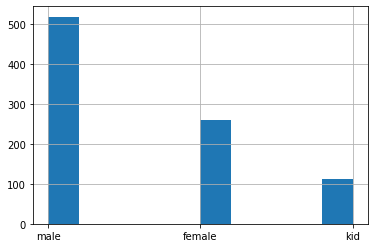

In [258]:
age_data = pass_data #копируем, чтобы не испортить
age_data.loc[(age_data['Age'] < 18, 'Sex')] = 'kid' # ставим пол "ребенок", если возраст меньше 18 лет
age_data.Sex.hist()